In [1]:
%matplotlib inline
from scipy import io
import numpy as np
import matplotlib.pyplot as plt
from scipy import io, signal # we will also import the signal module, from scipy
from IPython.display import Image

# Monkey Resting ECoG Data
Recorded from monkey whole cortex. ECoG sampled at 1000Hz, 3 channels. From **Yanagawa et al., PLOS ONE, 2013.**

In this experiment, the monkey is sitting in a chair with no task demands. 5 minutes of data each are provided during 3 different stages: awake eyes open, awake eyes closed, and anesthesized. They are stored in `ecog_eyesopen`,`ecog_eyesclosed`, and `ecog_anes` respectively. The sampling rate is provided, from which you can compute the time vectors (they can have their own time vectors all starting from 0s).

`labels` contains information about which brain regions the 3 channels are located in, while `elec_num` has the electrode number, which you can find on the brain map image included in the same folder (brainmap.jpg).

In [4]:
monkey_ecog_data = io.loadmat('ECoG_monkey/ECoG_monkey.mat', squeeze_me = True)
print(monkey_ecog_data.keys())
print(monkey_ecog_data['ecog_eyesopen'].shape)
print(monkey_ecog_data['labels'])
print(monkey_ecog_data['elec_num'])

dict_keys(['__header__', '__version__', '__globals__', 'ecog_anes', 'ecog_eyesclosed', 'ecog_eyesopen', 'elec_num', 'fs', 'labels'])
(3, 300000)
['cingulate' 'occipital' 'temporal']
[52 70 91]


In [2]:
elec_num = monkey_ecog_data['elec_num']
fs = monkey_ecog_data['fs']
labels = monkey_ecog_data['labels']

eyesopen_cingulate = monkey_ecog_data['ecog_eyesopen'][0,:]
eyesopen_occipital = monkey_ecog_data['ecog_eyesopen'][1,:]
eyesopen_temporal = monkey_ecog_data['ecog_eyesopen'][2,:]

anes_cingulate = monkey_ecog_data['ecog_anes'][0,:]
anes_occipital = monkey_ecog_data['ecog_anes'][1,:]
anes_temporal = monkey_ecog_data['ecog_anes'][2,:]

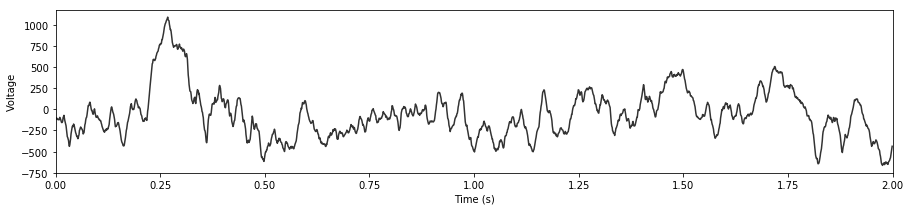

In [3]:
eyesopen_occipital_short = eyesopen_occipital[:int(2*fs)] 
t_short = np.arange(0, len(eyesopen_occipital_short)/fs, 1/fs)

plt.figure(figsize=(15,3))
plt.plot(t_short, eyesopen_occipital_short, 'k', alpha=0.8)
plt.xlim([0,2])
plt.xlabel('Time (s)');plt.ylabel('Voltage');

(0, 5)

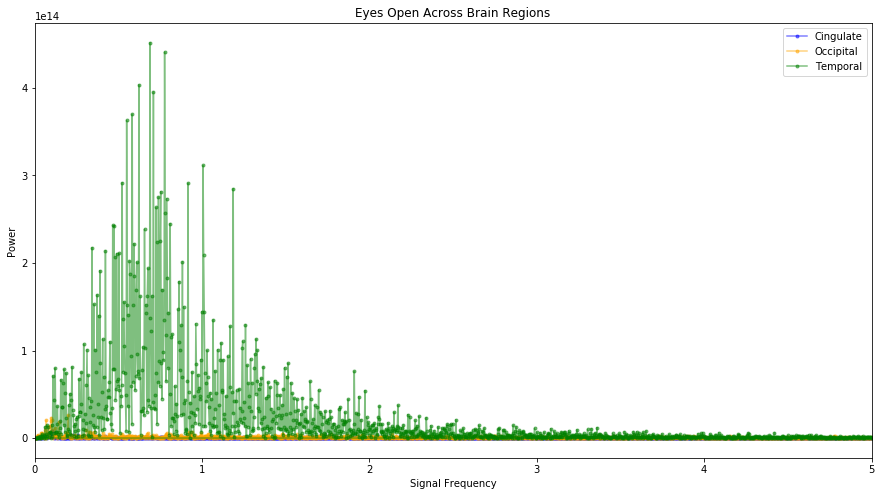

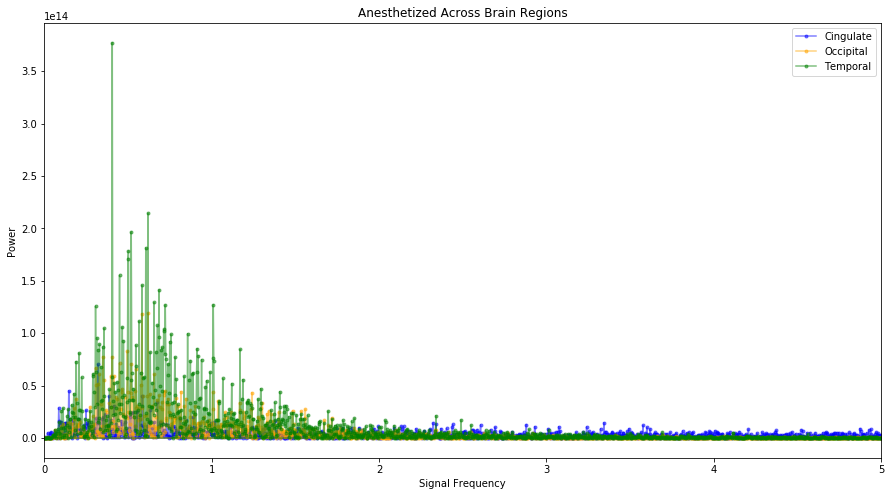

In [5]:
N = len(eyesopen_occipital)
freqs = np.fft.fftfreq(N,1/fs)

coef = np.fft.fft(eyesopen_cingulate)
ps_eoo = np.abs(coef)**2

coef = np.fft.fft(eyesopen_occipital)
ps_eco = np.abs(coef)**2

coef = np.fft.fft(eyesopen_temporal)
ps_eot = np.abs(coef)**2

coef = np.fft.fft(anes_cingulate)
ps_ect = np.abs(coef)**2

coef = np.fft.fft(anes_occipital)
ps_ao = np.abs(coef)**2

coef = np.fft.fft(anes_temporal)
ps_at = np.abs(coef)**2

plt.figure(figsize=(15,8))
plt.plot(freqs, ps_eoo, '.-', alpha=0.5, color='blue', label='Cingulate')
plt.plot(freqs, ps_eco, '.-', alpha=0.5, color='orange', label='Occipital')
plt.plot(freqs, ps_ao, '.-', alpha=0.5, color='green', label='Temporal')
plt.xlabel('Signal Frequency')
plt.ylabel('Power')
plt.title('Eyes Open Across Brain Regions')
plt.legend()
plt.xlim(0,5)

plt.figure(figsize=(15,8))
plt.plot(freqs, ps_eot, '.-', alpha=0.5, color='blue', label='Cingulate')
plt.plot(freqs, ps_ect, '.-', alpha=0.5, color='orange', label='Occipital')
plt.plot(freqs, ps_at, '.-', alpha=0.5, color='green', label='Temporal')
plt.xlabel('Signal Frequency')
plt.ylabel('Power')
plt.title('Anesthetized Across Brain Regions')
plt.legend()
plt.xlim(0,5)

In [ ]:
# PSDs
plt.figure(figsize=(5,5))
scipy_psd = np.array([i.mean() for i in spg_sp])
plt.figure(figsize=(5,5))
plt.plot(np.log10(f_sp), np.log10(scipy_psd), label='Scipy power spectral density')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')
plt.legend()

In [6]:
def spectrogram_calibration(spg, t, f, freq_lims=[0,100], plot_db=False):
    """
    Utility function for plotting the spectrogram for you.
    
    spg: spectrogram, 2D real-numbered array, dimensions are [frequency x time]
    t: time axis of spectrogram
    f: frequency axis of spectrogram
    freq_lims (optional): limits the frequency axis, defaults to 0-100Hz
    """
    
    plt.figure(figsize=(15,4))
    if plot_db:
        plt.imshow(10*np.log10(spg), aspect ='auto', extent=[t[0], t[-1], f[-1], f[0]])
    else:
        plt.imshow(spg, aspect='auto', extent=[t[0], t[-1], f[-1], f[0]])
    plt.xlabel('Time'); plt.ylabel('Frequency(Hz)');
    plt.ylim(freq_lims)
    plt.colorbar()
    plt.tight_layout()

In [7]:
def plot_spectrogram(data, len_win, len_overlap):
    f_sp, t_sp, spg_sp = signal.spectrogram(data, fs, window='rect', \
    nperseg=int(fs*len_win), noverlap=int(fs*len_overlap), detrend=False)
    spg_sp = spg_sp*fs**2*len_win/2
    spectrogram_calibration(np.log10(spg_sp), t_sp, f_sp, plot_db=False)

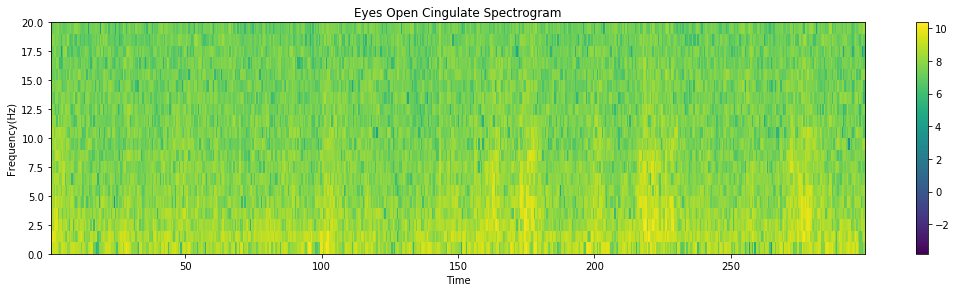

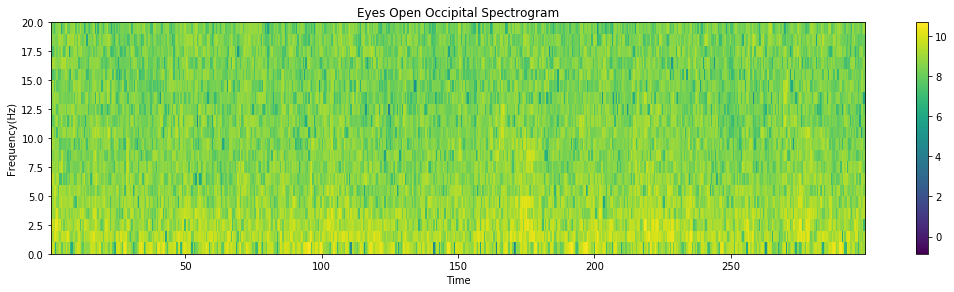

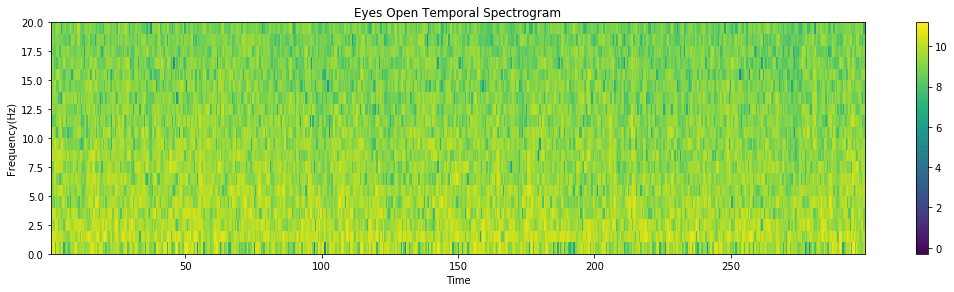

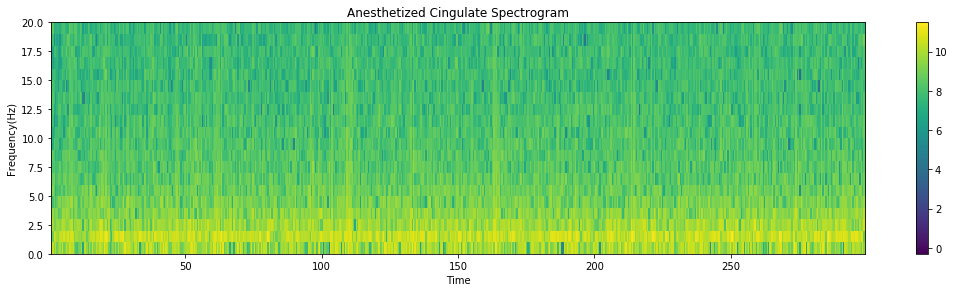

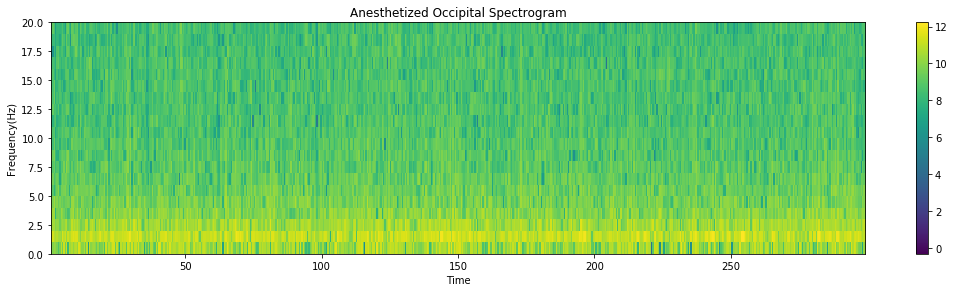

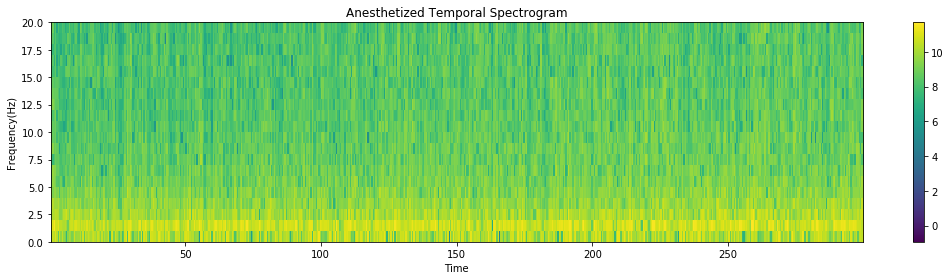

In [10]:
len_win = 1
len_overlap = 0.5
ylims = [0,20]

plot_spectrogram(eyesopen_cingulate, len_win, len_overlap)
plt.title('Eyes Open Cingulate Spectrogram')
plt.ylim(ylims)

plot_spectrogram(eyesopen_occipital, len_win, len_overlap)
plt.title('Eyes Open Occipital Spectrogram')
plt.ylim(ylims)

plot_spectrogram(eyesopen_temporal, len_win, len_overlap)
plt.title('Eyes Open Temporal Spectrogram')
plt.ylim(ylims)

plot_spectrogram(anes_cingulate, len_win, len_overlap)
plt.title('Anesthetized Cingulate Spectrogram')
plt.ylim(ylims)

plot_spectrogram(anes_occipital, len_win, len_overlap)
plt.title('Anesthetized Occipital Spectrogram')
plt.ylim(ylims)

plot_spectrogram(anes_temporal, len_win, len_overlap)
plt.title('Anesthetized Temporal Spectrogram')
plt.ylim(ylims)

plt.tight_layout()
plt.show()

In [ ]:
# implementation of fast cross-correlation
# np.convolve will always compute for all lag times,
# which is unwieldy with a long signal
# we usually just want the first few lags
def xcorr(data1, data2, maxlag=100, zero_center=False):
    acf = np.zeros(maxlag)
    acf[0] = np.correlate(data1,data2)
    for lag in range(1,maxlag):
        acf[lag] = np.correlate(data1[:-lag],data2[lag:])
    
    acf /= acf[0]
    if zero_center: acf[0]=np.nan
    return acf

In [ ]:
plt.figure(figsize=(15,5))
maxlag=int(fs)
t_ac = np.arange(0,maxlag/fs,1/fs)

plt.subplot(2,3,1)
plt.plot(t_ac, xcorr(eyesopen_occipital, eyesclosed_occipital, maxlag, True), '.')
plt.title('Eyes Open Occipital Autocorrelation')

plt.subplot(2,3,2)
plt.plot(t_ac, xcorr(eyesopen_temporal, eyesclosed_temporal, maxlag, True), '.')
plt.title('Spike Count Autocorrelation')

plt.subplot(2,3,3)
plt.plot(t_ac, xcorr(anes_occipital, anes_temporal, maxlag, True), '.')
plt.title('Spike Count-LFP Cross-correlation');

plt.subplot(2,3,4)
plt.plot(t_ac, xcorr(eyesclosed_temporal, eyesclosed_occipital, maxlag, True), '.')
plt.title('Eyes Open Occipital Autocorrelation')

plt.subplot(2,3,5)
plt.plot(t_ac, xcorr(anes_occipital, anes_occipital, maxlag, True), '.')
plt.title('Spike Count Autocorrelation')

plt.subplot(2,3,6)
plt.plot(t_ac, xcorr(anes_temporal, anes_temporal, maxlag, True), '.')
plt.title('Spike Count-LFP Cross-correlation');

plt.tight_layout()

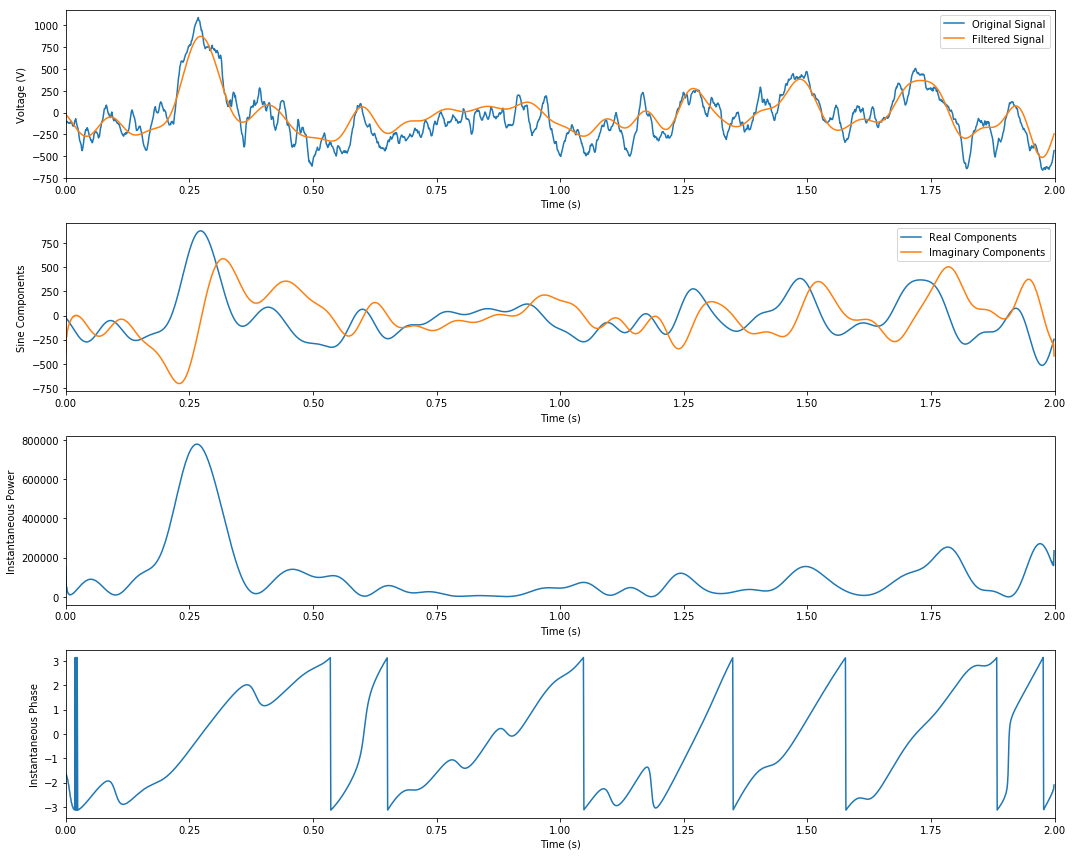

In [11]:
FIR_theta = signal.firwin(numtaps=751, cutoff=(1,13),\
                          fs=fs, pass_zero=False)
theta_osc = np.convolve(eyesopen_occipital_short, FIR_theta, mode='same')
x_a_theta = signal.hilbert(theta_osc)

def compute_power_phase(x_a):
    amp = np.abs(x_a.real-1j*x_a.imag)**2
    phase = np.angle(x_a)
    return amp, phase

theta_power, theta_phase = compute_power_phase(x_a_theta)

plt.figure(figsize=(15,12))
# plot the signal and the filtered signal
plt.subplot(4,1,1)
plt.plot(t_short, eyesopen_occipital_short, label='Original Signal')
plt.plot(t_short, theta_osc, label='Filtered Signal')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.legend()
plt.xlim(0,2)

# plot the real and imaginary components of the analytic signal
plt.subplot(4,1,2)
plt.plot(t_short, x_a_theta.real, label='Real Components')
plt.plot(t_short, x_a_theta.imag, label='Imaginary Components')
plt.xlabel('Time (s)')
plt.ylabel('Sine Components')
plt.legend()
plt.xlim(0,2)

# plot the instantaneous power 
plt.subplot(4,1,3)
plt.plot(t_short, theta_power)
plt.xlabel('Time (s)')
plt.ylabel('Instantaneous Power')
plt.xlim(0,2)

# plot the instantaneous phase
plt.subplot(4,1,4)
plt.plot(t_short, theta_phase)
plt.xlabel('Time (s)')
plt.ylabel('Instantaneous Phase')
plt.xlim(0,2)

plt.tight_layout()

Approaching X ms is the time point in which oscillation frequency is highest. This is because the instantaneous frequency is concave up and stops accelerating at around X ms.